# Downloading Packages

In [2]:
!pip install pandas numpy keras matplotlib scikit-learn

# Importing Packages

In [3]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Data Preprocessing

In [4]:
df = pd.read_excel('input copy full 2 (copy).xlsx')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,2023-02-28,NaN,04 06 10 26 30
1,2022-02-27,NaN,01 03 18 26 27
2,2022-02-26,NaN,13 17 18 50 60
3,2022-02-25,NaN,09 12 35 35 56
4,2022-02-24,NaN,15 21 39 45 49


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  1773 non-null   datetime64[ns]
 1   Unnamed: 1  0 non-null      float64       
 2   Unnamed: 2  1773 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 41.7+ KB


In [5]:
# split the numbers column into separate columns
numbers_df = df['Unnamed: 2'].str.split(expand=True)

In [6]:
numbers_df = numbers_df.astype(int)

In [7]:
numbers_df.describe()

,0,1,2,3,4
count,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000
mean,10.238579,20.166385,30.358150,40.503666,50.687535
std,8.142567,10.339112,11.019518,10.644396,8.242819
min,1.000000,2.000000,4.000000,6.000000,14.000000
25%,4.000000,12.000000,22.000000,34.000000,46.000000
50%,8.000000,19.000000,30.000000,42.000000,53.000000
75%,15.000000,27.000000,39.000000,49.000000,57.000000
max,46.000000,56.000000,58.000000,59.000000,60.000000


In [8]:
# normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
numbers_df = scaler.fit_transform(numbers_df)


In [9]:
# split the data into training and testing sets
train_size = int(len(numbers_df) * 0.7)
train_data = numbers_df[:train_size, :]
test_data = numbers_df[train_size:, :]


In [10]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :])
    return np.array(dataX), np.array(dataY)

In [11]:
# create the training and testing datasets
look_back = 5
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

# Model Training and Testing

In [12]:
# define the model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(5, 5)))
model.add(LSTM(units=50))
# Adding a first Dropout layer
model.add(Dropout(0.2))
# Adding the first output layer
model.add(Dense(59))
model.add(Dropout(0.2))
model.add(Dense(units=5))

# compile the model
model.compile(optimizer=Adam(learning_rate= 0.00001 ), loss ='mse', metrics=['accuracy'] )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             11200     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 59)                3009      
                                                                 
 dropout_1 (Dropout)         (None, 59)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 300       
                                                                 
Total params: 34,709
Trainable params: 34,709
Non-traina

In [13]:
# train the model
history = model.fit(trainX, trainY, validation_data =(testX, testY), epochs=50, batch_size=32)

Epoch 1/50
39/39 [==============================] - 8s 61ms/step - loss: 0.3312 - accuracy: 0.1036 - val_loss: 0.3204 - val_accuracy: 0.0721
Epoch 2/50
39/39 [==============================] - 1s 13ms/step - loss: 0.3189 - accuracy: 0.1634 - val_loss: 0.3084 - val_accuracy: 0.1025
Epoch 3/50
39/39 [==============================] - 1s 19ms/step - loss: 0.3073 - accuracy: 0.1893 - val_loss: 0.2965 - val_accuracy: 0.1139
Epoch 4/50
39/39 [==============================] - 1s 17ms/step - loss: 0.2953 - accuracy: 0.2662 - val_loss: 0.2848 - val_accuracy: 0.1499
Epoch 5/50
39/39 [==============================] - 1s 21ms/step - loss: 0.2837 - accuracy: 0.2937 - val_loss: 0.2731 - val_accuracy: 0.3359
Epoch 6/50
39/39 [==============================] - 1s 16ms/step - loss: 0.2712 - accuracy: 0.3803 - val_loss: 0.2611 - val_accuracy: 0.6584
Epoch 7/50
39/39 [==============================] - 0s 13ms/step - loss: 0.2606 - accuracy: 0.4280 - val_loss: 0.2491 - val_accuracy: 0.8083
Epoch 8/50
39

In [18]:
test_loss, test_acc = model.evaluate(testX, testY)
print('Test accuracy:', test_acc)

17/17 [==============================] - 0s 4ms/step - loss: 0.0389 - accuracy: 0.8292
Test accuracy: 0.8292220234870911


<AxesSubplot:>

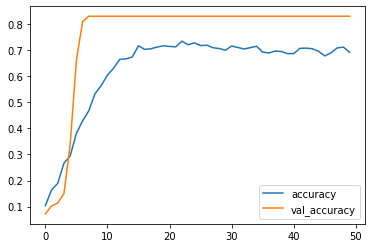

In [19]:
history_df = pd.DataFrame(history.history)
history_df[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

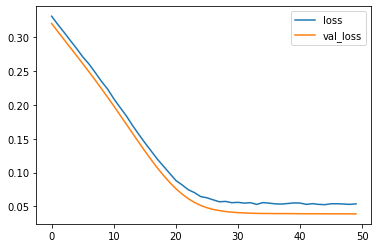

In [20]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()

# Prediction for Next Sequence

In [21]:
# use the model to predict the sequence of numbers
last_numbers = numbers_df[-5:]
last_numbers = np.reshape(last_numbers, (1, 5, 5))
predicted_numbers = model.predict(last_numbers)
predicted_numbers = scaler.inverse_transform(predicted_numbers)
predicted_numbers = [int(i) for i in predicted_numbers[0]]

print('Predicted next Sequence:', predicted_numbers)

1/1 [==============================] - 0s 22ms/step
Predicted next Sequence: [9, 19, 28, 37, 47]
